In [1]:
from nltk.corpus import wordnet as wn
import nltk

In [150]:
import os
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [151]:
# Hyperparameters

#concreteness_threshold = 2
concreteness_threshold = 7

# Number of positive examples we want for each classifier
#pos_count = 3
#neg_count = 9
#pos_count = 10
#neg_count = 20
pos_count = 15
neg_count = 40


test_pct = 0.33 #0.33

embedding_file = 'ddata/clip.bertvocab.embeddings.513.txt'
embedding_pickle = 'ddata/clip.bertvocab.embeddings.513.pkl'
concreteness_file = 'ddata/AC_ratings_google3m_koeper_SiW.csv'
concreteness_pickle = 'ddata/AC_ratings_google3m_koeper_SiW.pkl'

In [152]:
# wac2vec

if os.path.isfile(embedding_pickle):
    wac2vec = pickle.load(open(embedding_pickle, 'rb'))
else:
    with open(embedding_file) as f:
        f = f.readlines()
        f = [line.split() for line in f]
        wac2vec = {line[0]:np.array(line[1:], dtype=np.float64) for line in f}
        pickle.dump(wac2vec, open(embedding_pickle, "wb" ))

len(wac2vec)

30522

In [153]:
# concr_scores

if os.path.isfile(concreteness_pickle):
    concr_scores = pickle.load(open(concreteness_pickle, 'rb'))
else:
    concr_scores = pd.read_csv(concreteness_file, delimiter='\t')
    concr_scores = concr_scores.dropna()
    concr_scores.WORD = concr_scores.WORD.apply(lambda x: x.replace("_", " "))
    concr_scores.index = concr_scores.WORD
    pickle.dump(concr_scores, open(concreteness_pickle, "wb" ))

len(concr_scores)

2168990

In [6]:
X_features = []
for word in list(wac2vec.keys())[7000:7600]:
    X_features.append(wac2vec[word])

In [ ]:
# Test ConcreteAbstract Class

In [10]:
%load_ext autoreload

In [11]:
%autoreload 2

In [154]:
from concreteabstract import ConcreteAbstract

In [80]:
ca = ConcreteAbstract(wac2vec, concr_scores, wn)
ca.init_abstraction_tree(min_rating=9)
ca.grow_abstraction_tree()

  0%|          | 0/14510 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

In [81]:
#ca.build_display_tree(wn.synset('entity.n.01'), char_limit=5)

In [83]:
ca.add_pos_neg_all()

  0%|          | 0/4 [00:00<?, ?it/s]

In [84]:
ca.fill_out_train_test()

  0%|          | 0/4 [00:00<?, ?it/s]

In [85]:
ca.build_classifiers()

  0%|          | 0/4 [00:00<?, ?it/s]

In [86]:
ca.comp_random_baseline()

0.5

In [87]:
ca.comp_most_common_baseline()

0.5945945945945946

In [88]:
ca.evaluate_vs_negative_examples()

0.625

In [89]:
score, rand_baseline = ca.evaluate_vs_distractors(10)
print("score:    ", score)
print("baseline: ", rand_baseline)

  0%|          | 0/4 [00:00<?, ?it/s]

score:     0.8
baseline:  0.5


In [155]:
ca = ConcreteAbstract(wac2vec, concr_scores, wn, pos_count=10, neg_count=20)

In [156]:
ca.build_all(min_rating=8, test_pct=0.3, verbose=True)

Initiate Abstraction Tree


  0%|          | 0/14510 [00:00<?, ?it/s]

Grow Abstraction Tree


  0%|          | 0/343 [00:00<?, ?it/s]

Add Positive and Negative examples


  0%|          | 0/37 [00:00<?, ?it/s]

Fill out Train and Test sets


  0%|          | 0/37 [00:00<?, ?it/s]

Build Classifiers


  0%|          | 0/37 [00:00<?, ?it/s]

Done


In [157]:
ca.export_embeddings('ddata/new_embeddings')

  0%|          | 0/30522 [00:00<?, ?it/s]

New Embeddings Exported:  38
File:  ddata/new_embeddings_r8_p10_n20_t0.3_c38.txt


In [ ]:
# Let's find a good set of hyperparameters

In [118]:
ca = ConcreteAbstract(wac2vec, concr_scores, wn, pos_count=5, neg_count=20)
ca.build_all(min_rating=5, test_pct=0.3, verbose=True)
score, rand_baseline = ca.evaluate_vs_distractors(10)
print("score:    ", score)
print("baseline: ", rand_baseline)

Initiate Abstraction Tree


  0%|          | 0/14510 [00:00<?, ?it/s]

Grow Abstraction Tree


  0%|          | 0/3605 [00:00<?, ?it/s]

Add Positive and Negative examples


  0%|          | 0/465 [00:00<?, ?it/s]

Fill out Train and Test sets


  0%|          | 0/465 [00:00<?, ?it/s]

Build Classifiers


  0%|          | 0/465 [00:00<?, ?it/s]

Done


  0%|          | 0/465 [00:00<?, ?it/s]

score:     0.33590462833099577
baseline:  0.09197626418988648


In [119]:
ca.export_embeddings('ddata/new_embeddings')

  0%|          | 0/30522 [00:00<?, ?it/s]

New Embeddings Exported:  417
File:  ddata/new_embeddings_r5_p5_n20_t0.3_c417.txt


In [123]:
ca2 = ConcreteAbstract(wac2vec, concr_scores, wn, pos_count=3, neg_count=15)
ca2.build_all(min_rating=4, test_pct=0.3, verbose=True)
score, rand_baseline = ca2.evaluate_vs_distractors(10)
print("score:    ", score)
print("baseline: ", rand_baseline)

Initiate Abstraction Tree


  0%|          | 0/14510 [00:00<?, ?it/s]

Grow Abstraction Tree


  0%|          | 0/4861 [00:00<?, ?it/s]

Add Positive and Negative examples


  0%|          | 0/1031 [00:00<?, ?it/s]

Fill out Train and Test sets


  0%|          | 0/1031 [00:00<?, ?it/s]

Build Classifiers


  0%|          | 0/1031 [00:00<?, ?it/s]

Done


  0%|          | 0/1031 [00:00<?, ?it/s]

score:     0.3773955773955774
baseline:  0.09134572223718466


In [127]:
ca3 = ConcreteAbstract(wac2vec, concr_scores, wn, pos_count=3, neg_count=15)
ca3.build_all(min_rating=4, test_pct=0, verbose=True)

Initiate Abstraction Tree


  0%|          | 0/14510 [00:00<?, ?it/s]

Grow Abstraction Tree


  0%|          | 0/4861 [00:00<?, ?it/s]

Add Positive and Negative examples


  0%|          | 0/1031 [00:00<?, ?it/s]

Fill out Train and Test sets


  0%|          | 0/1031 [00:00<?, ?it/s]

Build Classifiers


  0%|          | 0/1031 [00:00<?, ?it/s]

Done


In [128]:
ca3.export_embeddings('ddata/new_embeddings')

  0%|          | 0/30522 [00:00<?, ?it/s]

New Embeddings Exported:  900
File:  ddata/new_embeddings_r4_p3_n15_t0_c900.txt


In [129]:
ca4 = ConcreteAbstract(wac2vec, concr_scores, wn, pos_count=3, neg_count=15)
ca4.build_all(min_rating=2, test_pct=0.3, verbose=True)
score, rand_baseline = ca2.evaluate_vs_distractors(10)
print("score:    ", score)
print("baseline: ", rand_baseline)

Initiate Abstraction Tree


  0%|          | 0/14510 [00:00<?, ?it/s]

Grow Abstraction Tree


  0%|          | 0/6881 [00:00<?, ?it/s]

Add Positive and Negative examples


  0%|          | 0/1305 [00:00<?, ?it/s]

Fill out Train and Test sets


  0%|          | 0/1305 [00:00<?, ?it/s]

Build Classifiers


  0%|          | 0/1305 [00:00<?, ?it/s]

Done


  0%|          | 0/1031 [00:00<?, ?it/s]

score:     0.39017199017199017
baseline:  0.09146889608054656


In [158]:
ca5 = ConcreteAbstract(wac2vec, concr_scores, wn, pos_count=3, neg_count=15)
ca5.build_all(min_rating=2, test_pct=0, verbose=True)

Initiate Abstraction Tree


  0%|          | 0/14510 [00:00<?, ?it/s]

Grow Abstraction Tree


  0%|          | 0/6881 [00:00<?, ?it/s]

Add Positive and Negative examples


  0%|          | 0/1305 [00:00<?, ?it/s]

Fill out Train and Test sets


  0%|          | 0/1305 [00:00<?, ?it/s]

Build Classifiers


  0%|          | 0/1305 [00:00<?, ?it/s]

Done


In [159]:
ca5.export_embeddings('ddata/new_embeddings')

  0%|          | 0/30522 [00:00<?, ?it/s]

New Embeddings Exported:  1158
File:  ddata/new_embeddings_r2_p3_n15_t0_c1158.txt


In [160]:
ca7 = ConcreteAbstract(wac2vec, concr_scores, wn, pos_count=8, neg_count=15)
ca7.build_all(min_rating=2, test_pct=0, verbose=True)

Initiate Abstraction Tree


  0%|          | 0/14510 [00:00<?, ?it/s]

Grow Abstraction Tree


  0%|          | 0/6881 [00:00<?, ?it/s]

Add Positive and Negative examples


  0%|          | 0/445 [00:00<?, ?it/s]

Fill out Train and Test sets


  0%|          | 0/445 [00:00<?, ?it/s]

Build Classifiers


  0%|          | 0/445 [00:00<?, ?it/s]

Done


In [161]:
ca7.export_embeddings('ddata/new_embeddings')

  0%|          | 0/30522 [00:00<?, ?it/s]

New Embeddings Exported:  433
File:  ddata/new_embeddings_r2_p8_n15_t0_c433.txt


In [162]:
# Visualize 2D

In [174]:
def visual_get_categories(ca, start_ss, depth=1):
    hypos = ca.abstraction_tree.loc[start_ss, 'HYPONYMS']
    if depth <= 0:
        return hypos
    
    ret = []
    for h in hypos:
        ret = ret + visual_get_categories(ca, h, depth-1)
    return ret

def get_offspring(ca, parent_ss):
    offspring = []
    absraction_levels = []
    hypos = ca.abstraction_tree.loc[parent_ss, 'HYPONYMS']
    emb = ca.abstraction_tree.loc[parent_ss, 'EMBEDDING']
    a_level = ca.abstraction_tree.loc[parent_ss, 'DIST2LEAF']

    #print(parent_ss)
    #print(emb)
    #print(hypos)
    if emb is not None:
        offspring.append(emb)
        absraction_levels.append(a_level)
    for ss in hypos:
        off, a_level = get_offspring(ca, ss)
        offspring += off
        absraction_levels += a_level
    return offspring, absraction_levels

def visual_get_X_features(ca, ss_list):
    X_features = []
    X_colors = []
    for i, parent_ss in enumerate(ss_list):
        #print(i)
        offspring, a_levels = get_offspring(ca, parent_ss)
        X_features += offspring
        X_colors += [i]*len(offspring)
        #X_colors += a_levels
    
    return X_features, X_colors

In [185]:
visual_categories = visual_get_categories(ca7, wn.synset('entity.n.01'), 2)
X_features, X_colors = visual_get_X_features(ca7, visual_categories)
print(len(X_features), len(X_colors))

5358 5358


In [186]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

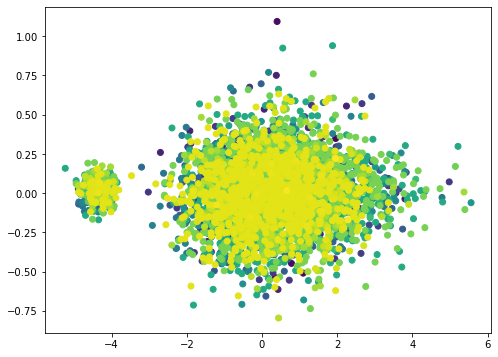

In [187]:
pca2 = PCA(n_components=368)
pca2.fit(X_features)
x_3d = pca2.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,105], c=X_colors)
plt.show()